[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/francisco-ortin/data-science-course/blob/main/data-proc-visual/visualization.ipynb)
[![License: CC BY-NC-SA 4.0](https://img.shields.io/badge/License-CC%20BY--NC--SA%204.0-lightgrey.svg)](https://creativecommons.org/licenses/by-nc-sa/4.0/)

# Data Visualization

Pandas and NumPy provide many functionalities to work with tabular data. However, the human brain excels at picking out visual patterns, so data visualization is an important task in data science. Data visualization is the graphical representation of data. It involves producing images that communicate
relationships among the represented data to viewers of the images. 

There are numerous types of visualizations. We will cover the most common plot types, such as line plots, histograms, scatter plots, and bar plots. We will use the [Matplotlib](https://matplotlib.org/) and [Seaborn](https://seaborn.pydata.org/) libraries to create these visualizations.


In [1]:
# make sure the required packages are installed
%pip install numpy pandas matplotlib seaborn --quiet
# if running in colab, install the required packages and copy the necessary files
directory='data-science-course/data-proc-visual'
if get_ipython().__class__.__module__.startswith('google.colab'):
    !export directory="data-science-course/statistics"
    !git clone https://github.com/francisco-ortin/data-science-course.git  2>/dev/null
    !mkdir -p img data
    !cp {directory}/img/* img/.
    !cp {directory}/data/* data/.

Note: you may need to restart the kernel to use updated packages.



## Matplotlib

<img src="img/matplotlib.png" width="400">

[Matplotlib](https://matplotlib.org/) is a plotting library for the Python programming language, NumPy and Pandas. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits. It allows creating many different types of plot; we will cover the most common ones.

### Pyplot

[Pyplot](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html) is a Matplotlib module that provides a MATLAB-like interface. It is a collection of command style functions that make Matplotlib work like MATLAB. Pyplot functions manages the current Figure and Axes, allowing to create a plot with a single function call.

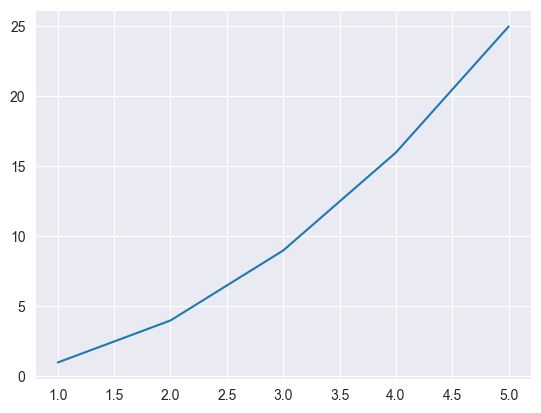

In [2]:
import matplotlib.pyplot as plt  # pyplot is commonly imported as plt
# Display plots in Jupyter Notebook (do not use it in applications)
%matplotlib inline 
# One command to create a plot
plt.plot([1, 2, 3, 4, 5], [1, 4, 9, 16, 25])  # x and y values

### Line Plots

We have just created a simple line plot using the `pyplot` module. The `plot` function creates a line plot by default, but it can be
customized with many parameters. The `title`, `xlabel`, and `ylabel` functions are used to add a title and labels to the plot.

Important: If we are not running the code in a Jupyter Notebook, we need to use the `show` function to display the plot. In Jupyter Notebook, the plots are displayed automatically. `show` can then be used to display the plot explicitly (e.g., when we have multiple plots in the same Jupyter cell). 

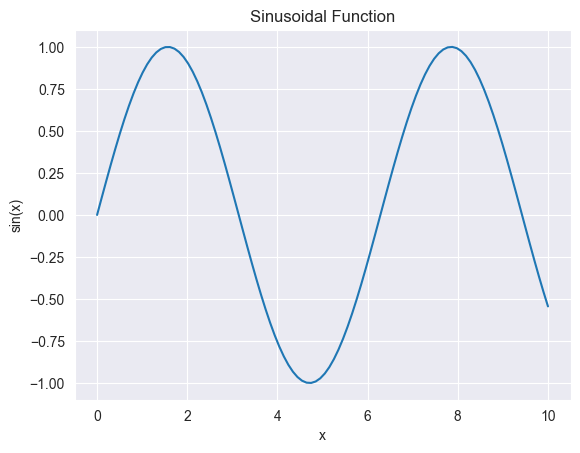

In [3]:
import numpy as np
x = np.linspace(0, 10, 100)  # 0 to 10 with 100 points
y = np.sin(x)
plt.plot(x, y)
plt.title('Sinusoidal Function')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.show()  # Not necessary in Jupyter Notebook

We can add multiple lines to the same plot by calling the `plot` function multiple times. We can also customize the line style, color, and width. To show the legend, we need to add a label to each line and call the `legend` function.

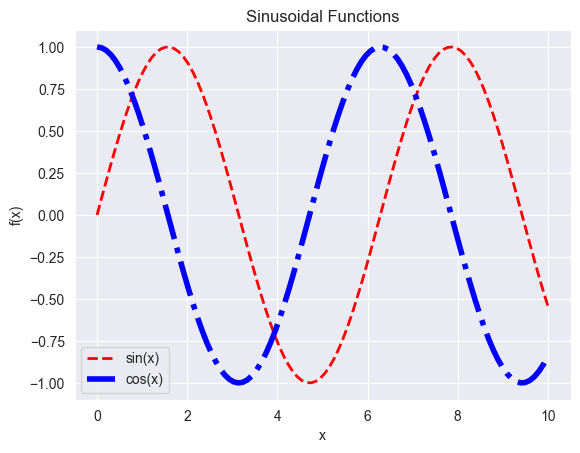

In [4]:
plt.plot(x, np.sin(x), label='sin(x)', color='red', linestyle='--', linewidth=2)  # Red dashed line (2 pixels width; default is 1 pixel)
plt.plot(x, np.cos(x), label='cos(x)', color='blue', linestyle='-.', linewidth=4)  # Blue dash-dot line (4 pixels width)
# to see all the possible line styles, visit https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html
# for colors, visit https://matplotlib.org/stable/gallery/color/named_colors.html
plt.title('Sinusoidal Functions')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()  # Show the legend

### Figure and Axes

The `pyplot` module is convenient for simple plots, but it is not recommended for complex plots. It abstracts you from the `Figure` and `Axes` objects, which are the core of Matplotlib. Matplotlib uses a hierarchy of objects to display plots. The `Figure` object is the top-level container that holds all elements of the plot. The `Axes` object is the region of the image with the data space (i.e., the canvas). The `Figure` object can contain multiple `Axes` objects. We can create a `Figure` object with the `figure` function and add an `Axes` object with the `add_axes` function.

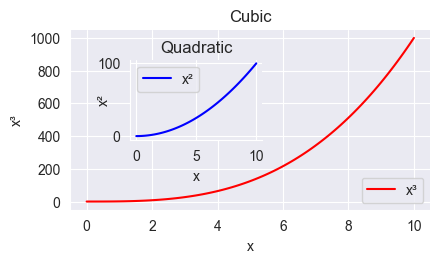

In [5]:
figure = plt.figure(figsize=(4, 2))  # Create a Figure object; figsize sets the width and height in inches (allows you to control the aspect ratio)
# main plot in the figure
axes1 = figure.add_axes([0.1, 0.1, 0.9, 0.9])  # Add an Axes to draw a plot from (10%, 10%) to (90%, 90%)
axes1.set_title('Cubic')
axes1.plot(x, x**3, label='x³', color='red')
axes1.set_xlabel('x')
axes1.set_ylabel('x³')
axes1.legend(loc=4)  # loc=4 is the lower right corner
# remove the top and right spines
axes1.spines['top'].set_visible(False)
axes1.spines['right'].set_visible(False)
# let's create a smaller plot inside the main plot
axes2 = figure.add_axes([0.25, 0.45, 0.33, 0.4])  # Add an Axes to draw a plot from (20%, 50%) to (60%, 90%)
axes2.set_title('Quadratic')
axes2.plot(x, x**2, label='x²', color='blue')
axes2.set_xlabel('x')
axes2.set_ylabel('x²', labelpad=-10)  # move the label closer to the axis
axes2.legend(loc=2)  # loc=2 is the upper left corner
# remove the top and right spines
axes2.spines['top'].set_visible(False)
axes2.spines['right'].set_visible(False)

### Subplots

It is very common we want to visualize different plots in the same figure. We can use the `subplots` function to create a grid of subplots. The `subplots` function returns a `Figure` object and an array of `Axes` objects. We can access each `Axes` object by indexing the array and create a plot in each `Axes` object. The `tight_layout` function adjusts the subplots to fit into the figure area. 

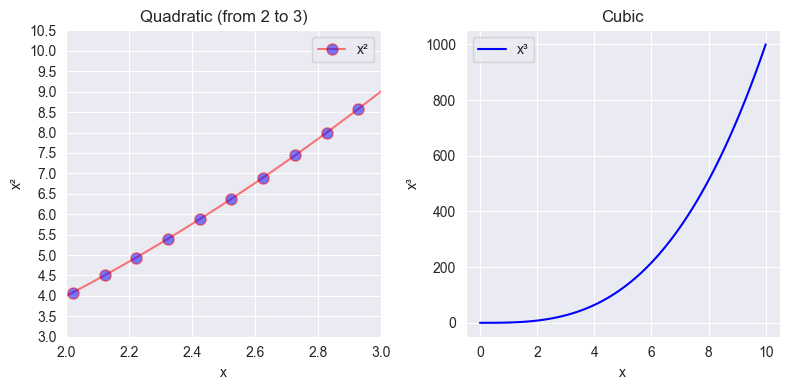

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))  # Create a 1x2 grid of subplot
# Plot in the first subplot
axes[0].plot(x, x**2, label='x²', color='red', 
             marker='o', # shows a marker at each point; 'o' is a circle marker; checkout the markers at https://matplotlib.org/stable/api/markers_api.html
             markersize=8, # size of the marker
             markerfacecolor='blue', # color of the marker
             alpha=0.5)  # alpha is the transparency level (0 is transparent, 1 is opaque); useful for overlapping points
axes[0].set_title('Quadratic (from 2 to 3)')
axes[0].set_xlabel('x')
axes[0].set_ylabel('x²')
axes[0].legend()
axes[0].set_xlim([2, 3])  # set the x-axis limits
axes[0].set_ylim([3, 10])  # set the y-axis limits
axes[0].set_yticks(np.arange(3, 11, 0.5))  # set the y-axis ticks (from 3 to 10 with 0.5 step)

axes[0].grid(True)  # show the grid
# Plot in the second subplot with many default values to compare with the previous plot
axes[1].plot(x, x**3, label='x³', color='blue')
axes[1].set_title('Cubic')
axes[1].set_xlabel('x')
axes[1].set_ylabel('x³')
axes[1].legend()
plt.tight_layout()  # Adjust the subplots to better fit into the figure area

The `savefig` function saves the current figure to a file. The file format is inferred from the file extension. The `dpi` parameter sets the resolution of the figure (dots per inch).

In [7]:
fig.savefig('img/subplots.png', dpi=600)  # Save the figure as a raster file
fig.savefig('img/subplots.svg')  # Save the figure as a vectorial file

### Histograms

Histograms are used to represent the distribution of a numerical (quantitative) variable. If the variable is categorical (qualitative), the figure is called a bar plot.

To construct a histogram, the first step is to "bin" (or "bucket") the range of values (divide the entire range of values into a series of intervals) and then count how many values fall into each interval. The bins are usually specified as consecutive, non-overlapping intervals of a variable. The bins (intervals) are adjacent and are typically (but not required to be) of equal size.

The Matplotlib `hist` function creates a histogram. We can customize the number of bins by setting the `bins` parameter. The `hist` function returns a tuple with the values of the histogram (frequency of each bin), the bins (the edges of the bins), and the patches (the individual bars of the histogram). Many of the appearance options are similar to the `plot` function.

First 10 values: [ 0.27918033  1.65528919 -1.39470625 -1.21659602  0.90071481 -0.27269445
 -0.02957325  1.50997415  1.38694085  1.20897665].
Frequencies: [ 1.  2.  4.  5. 16. 11. 28. 45. 43. 33. 55. 62. 70. 73. 81. 77. 61. 67.
 56. 55. 42. 26. 19. 24. 17. 10.  6.  4.  4.  3.]
Bins: [-2.88935705 -2.69483765 -2.50031826 -2.30579886 -2.11127946 -1.91676007
 -1.72224067 -1.52772127 -1.33320188 -1.13868248 -0.94416308 -0.74964369
 -0.55512429 -0.36060489 -0.1660855   0.0284339   0.2229533   0.41747269
  0.61199209  0.80651149  1.00103088  1.19555028  1.39006968  1.58458907
  1.77910847  1.97362787  2.16814726  2.36266666  2.55718606  2.75170545
  2.94622485]


Text(0, 0.5, 'Frequency')

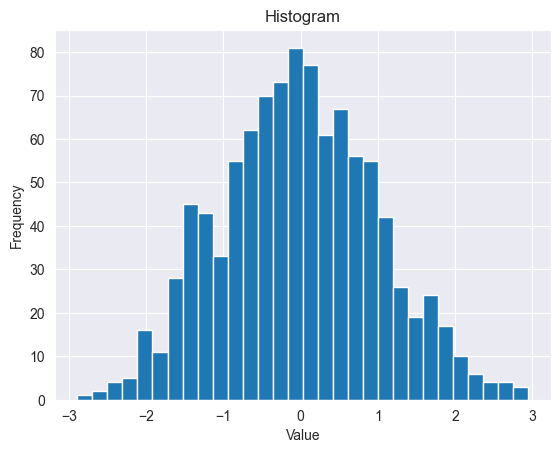

In [8]:
data = np.random.randn(1000)  # 1000 random values from a normal distribution (mean=0, std=1)
print(f"First 10 values: {data[:10]}.")
frequencies, bins, _ = plt.hist(data, bins=30)  # 30 bins; the third return value is the individual bars of the histogram (patches)
# with the density=True parameter to hist, the histogram is normalized to form a probability density (area under the histogram is 1)
print(f"Frequencies: {frequencies}")
print(f"Bins: {bins}")
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')

### Interaction with Pandas

So far, we have created plots using NumPy arrays and lists. Pandas `Series` and `DataFrame`s can also be passed as arguments. 


Text(0, 0.5, 'Frequency')

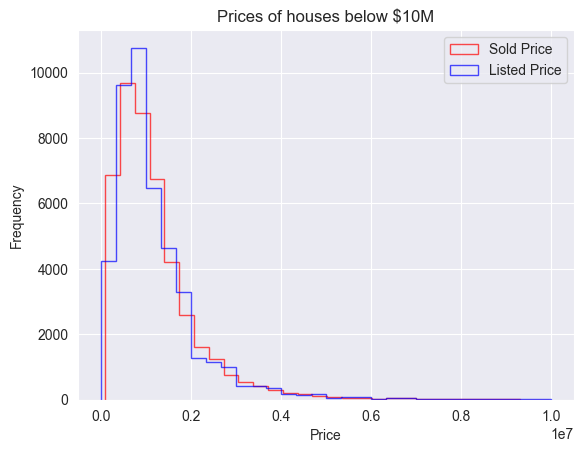

In [9]:
import pandas as pd
# read the data from the data/housing.csv file
housing_df = pd.read_csv('data/small_housing.csv')
# plot two overlapping histograms: sold prices and list prices
plt.hist(housing_df['Sold Price'], 
         histtype='step',  # histtype='step' shows only the contour of the bars (no fill)
         bins=30, alpha=0.7, color='red', label='Sold Price')  
plt.hist(housing_df['Listed Price'], histtype='step', bins=30, alpha=0.7, color='blue', label='Listed Price')
plt.title('Prices of houses below $10M')
plt.legend()
plt.xlabel('Price')
plt.ylabel('Frequency')

We can create plots directly from Pandas `DataFrame`s and `Series` by calling their `plot` method. The `plot` method is a wrapper around the `pyplot` module, so we can use the same parameters to customize the plot. The `kind` parameter specifies the type of plot.

Text(0.5, 0, 'Frequency')

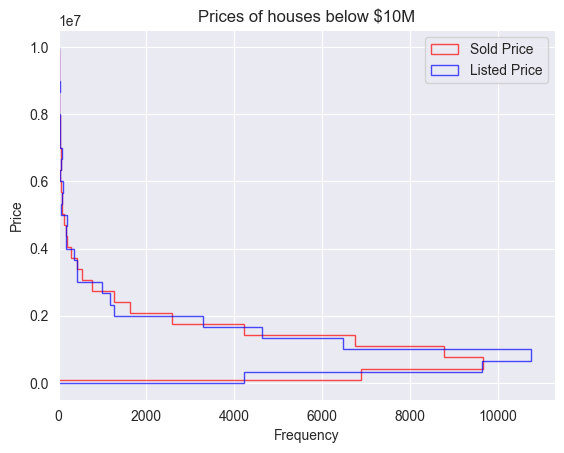

In [10]:
housing_df['Sold Price'].plot(kind='hist',  # kind='hist' creates a histogram
                                        bins=30, alpha=0.7, color='red', label='Sold Price', histtype='step', 
                                        orientation='horizontal')  # horizontal orientation  
housing_df['Listed Price'].plot(kind='hist', bins=30, alpha=0.7, color='blue', label='Listed Price', histtype='step', orientation='horizontal')
plt.title('Prices of houses below $10M')
plt.legend()
plt.ylabel('Price')
plt.xlabel('Frequency')

### Bar Charts

Bar charts are very versatile. They can be used to show the frequency of a categorical variable (like a histogram), to compare different groups of data, or to show the evolution of a variable over time. The `bar` function creates a bar chart (by default bars are vertical; use `barh` for horizontal bars). Whiskers can be added to the bars with the `yerr` parameter to represent the standard deviation or the confidence interval.

Text(0, 0.5, 'Execution time (seconds)')

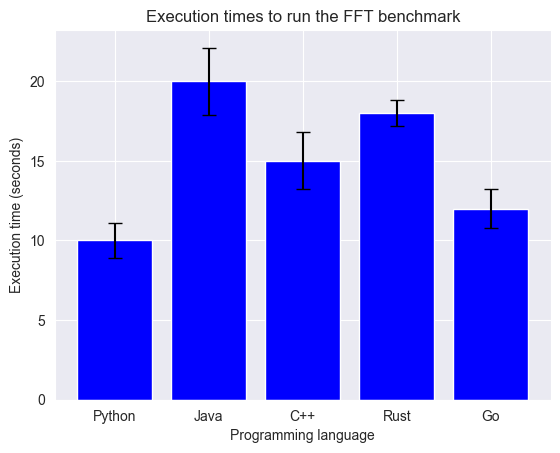

In [11]:
# execution times of different languages for a given benchmark (FFT, fast Fourier transform)
languages = ['Python', 'Java', 'C++', 'Rust', 'Go']
seconds = [10, 20, 15, 18, 12]
confidence_intervals = [1.1, 2.1, 1.8, 0.8, 1.2]  # 95% confidence intervals
plt.bar(languages, seconds, yerr=confidence_intervals, color='blue', 
        capsize=5)  # capsize is the size of the top and bottom horizontal lines of the whiskers 
plt.title('Execution times to run the FFT benchmark')
plt.xlabel('Programming language')
plt.ylabel('Execution time (seconds)')

We can create different group of bars. In our example, we will show the execution times of the different languages for the following benchmarks: FFT, matrix multiplication, and sorting.

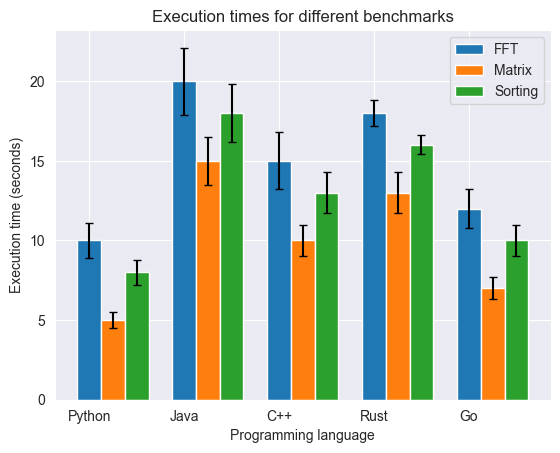

In [12]:
# execution times of different languages for three benchmarks
languages = ['Python', 'Java', 'C++', 'Rust', 'Go']
benchmarks = ['FFT', 'Matrix', 'Sorting']
execution_times = {benchmarks[0]: [10, 20, 15, 18, 12], benchmarks[1]: [5, 15, 10, 13, 7], benchmarks[2]: [8, 18, 13, 16, 10]}
confidence_intervals = { benchmarks[0]: [1.1, 2.1, 1.8, 0.8, 1.2], benchmarks[1]: [0.5, 1.5, 1.0, 1.3, 0.7], benchmarks[2]: [0.8, 1.8, 1.3, 0.6, 1.0] }
spaces = np.arange(len(languages))  # the x locations for the groups of bars are [0, 1, 2, 3, 4]
# bar_with is the width of the bars expressed as a fraction of the space for the bars (we took 1 for that space (i.e., the spaces variable)))
# We take 0.25 because we are drawing 3 bars (3 benchmarks) and we want to leave the size of a bar between each group of bars 
bar_width = 1/(len(benchmarks)+1)  # 1/4 = 0.25
for i, benchmark in enumerate(benchmarks):
    # show each group of bars with a different color in a different position (spaces + i*bar_width)
    plt.bar(spaces + i*bar_width, execution_times[benchmark], width=bar_width, yerr=confidence_intervals[benchmark], label=benchmark, capsize=3)
plt.title('Execution times for different benchmarks')
plt.xlabel('Programming language')
plt.ylabel('Execution time (seconds)')
# The x-ticks is in the center of the first bar of each group of bars (in the spaces variable)
# We have to add bar_width select the second bar (there are 3)
plt.xticks(spaces + bar_width*len(benchmarks)//2, languages)  # set the x-ticks to be the center of the bars and the label of each language
plt.legend()

### Scatter Plots

Scatter plots are used to represent the relationship between two numerical variables. Each point represents an observation. The `scatter` function creates a scatter plot. We can customize the size, color, and transparency of the points.

Let's show a scatter plot of the small houses' dataset. We visualize the relationship between the square footage and the sold price of the houses. At the same time, the color of the points will represent the Listed Price.

Text(0, 0.5, 'Sold Price')

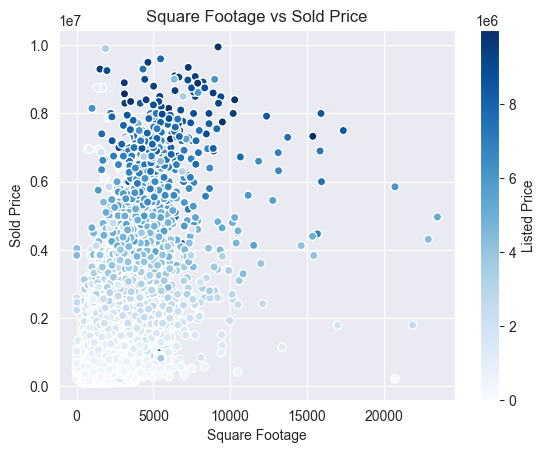

In [13]:
plt.scatter(housing_df['Total interior livable area'], housing_df['Sold Price'], 
            c=housing_df['Listed Price'],  # color of the dots  
            cmap='Blues',  # cmap selects the colormap for the dots (Blues is a colormap from light to dark blue)
            edgecolors='white', linewidth=1)  # show a circle around the points with a white edge of 1 pixel
# show the listed price as a colorbar
plt.colorbar(label='Listed Price')
plt.title('Square Footage vs Sold Price')
plt.xlabel('Square Footage')
plt.ylabel('Sold Price')

## ✨ Activity ✨

You have to practice creating plots using Matplotlib using the `data/small_housing.csv` dataset. You will be asked to visualize something specific about the dataset. First, you have to think about the most appropriate plot to show the information. Then, you will create the plot using Matplotlib.

1. Visualize the distribution of sold prices for houses with 3 bathrooms.
2. Visualize the correlation between the sold price and the total interior livable area the houses (be aware of missing values).
3. Visualize the trend of house prices over time (per year, ascending order), using the Last Sold On feature (be aware of missing values).
4. Visualize the average sold price grouped by some predefined type of house: `['Flat', 'Condo', 'Townhouse', 'Apartment', 'Luxury', 'Duplex', 'Triplex']`. A house has that type when its `Type` feature includes one of the previous type words (case-insensitive). In the plot, include the standard deviation of the sold prices.

In [14]:
# Write your code here



## Seaborn

<img src="img/seaborn.png" width="400">

[Seaborn](https://seaborn.pydata.org/) is a Python data visualization library based on Matplotlib. It provides a high-level interface for creating attractive and informative statistical graphics. Seaborn is built on top of Matplotlib and tightly integrated with Pandas data structures.

Compared to Matplotlib, Seaborn provides more modern, visually appealing default styles, while Matplotlib’s defaults are more basic. Seaborn is higher-level and focuses on statistical plots, while Matplotlib is a low-level library offering more control. Good news is that it is so easy to understand and use Seaborn if you are already familiar with Matplotlib.

### Pair Plots

Pair plots are used to visualize the relationship between each pair of numerical variables in a dataset. It is widely used in exploratory data analysis. The `pairplot` function creates a grid of scatter plots. 

1. The `pairplot` function creates a grid of scatter plots. 
2. The diagonal of the grid shows the distribution of each variable. 

The `hue` parameter is used to color the points by a categorical variable.

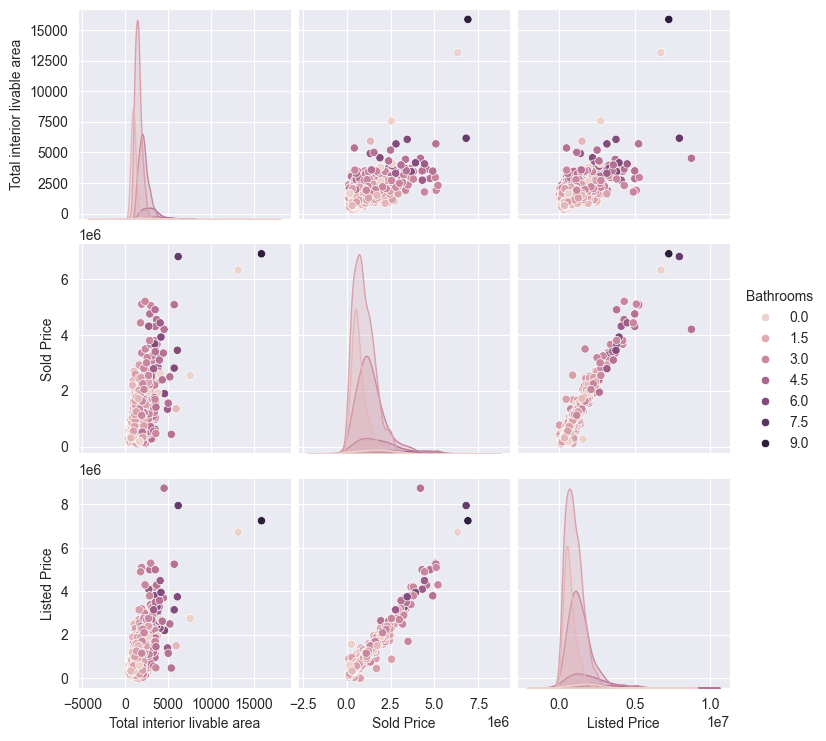

In [15]:
import seaborn as sns
# load the  small housing dataset
housing_df = pd.read_csv('data/small_housing.csv')
small_housing_df_sample = housing_df.sample(n=1000, random_state=42)  # select 100 random samples from the dataset (to speed up the computation)
small_housing_df_sample = small_housing_df_sample[['Total interior livable area', 'Sold Price', 'Listed Price', 'Bathrooms']]
sns.pairplot(small_housing_df_sample, hue='Bathrooms')  # color by the number of bathrooms

### Diagrams in Seaborn

These are the names of the Matplotlib plots and their corresponding Seaborn functions:


| Matplotlib | Seaborn       |
|------------|---------------|
| `plot`     | `lineplot`    |
| `hist`     | `histplot`    |
| `bar`      | `barplot`     |
| `scatter`  | `scatterplot` |

We now show some examples of the diagrams we created in Matplotlib using Seaborn. The Seaborn functions are very similar to the Matplotlib functions, but they provide more options to customize the plots (refer to the documentation for more details).

### Line Plots

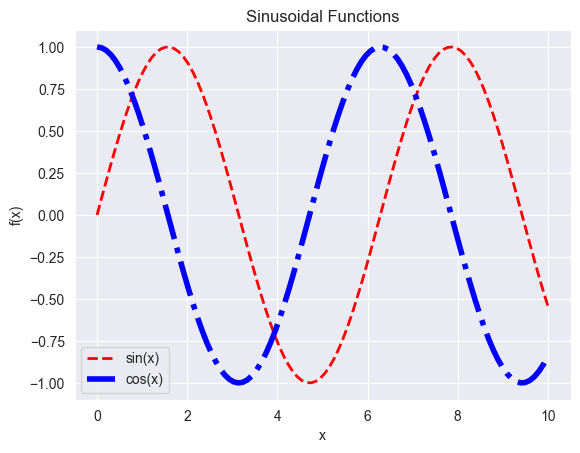

In [16]:
# Instead of plt.plot, we use sns.lineplot. The parameters are similar to plt.plot, but x and y are named parameters.
sns.lineplot(x=x, y=np.sin(x), label='sin(x)', color='red', linestyle='--', linewidth=2)
sns.lineplot(x=x, y=np.cos(x), label='cos(x)', color='blue', linestyle='-.', linewidth=4)
plt.title('Sinusoidal Functions')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()  # Show the legend

### Histograms

Text(0, 0.5, 'Frequency')

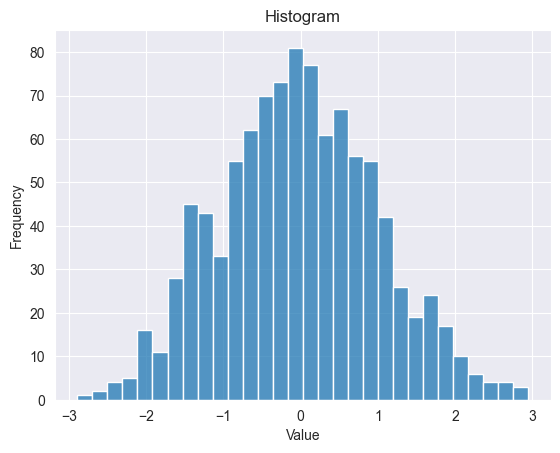

In [17]:
# Instead of plt.hist, we use sns.histplot.
sns.histplot(data, bins=30)
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')

### Bar Charts

Text(0, 0.5, 'Execution time (seconds)')

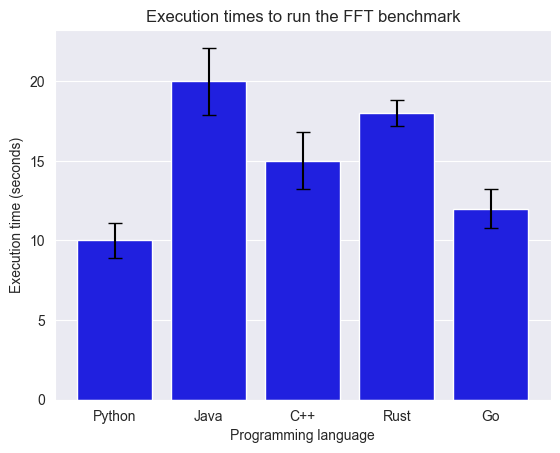

In [18]:
# Instead of plt.bar, we use sns.barplot.
languages = ['Python', 'Java', 'C++', 'Rust', 'Go']
seconds = [10, 20, 15, 18, 12]
confidence_intervals = [1.1, 2.1, 1.8, 0.8, 1.2]  # 95% confidence intervals
sns.barplot(x=languages, y=seconds, color='blue')
# We add the whiskers with the confidence intervals using Matplotlib (capsize does not work in Seaborn)
plt.errorbar(x=range(len(languages)), y=seconds, yerr=confidence_intervals, capsize=5, color='black',
             fmt='none')  # fmt='none' removes the connecting lines between the whiskers
plt.title('Execution times to run the FFT benchmark')
plt.xlabel('Programming language')
plt.ylabel('Execution time (seconds)')


### Scatter Plots

Text(0, 0.5, 'Sold Price')

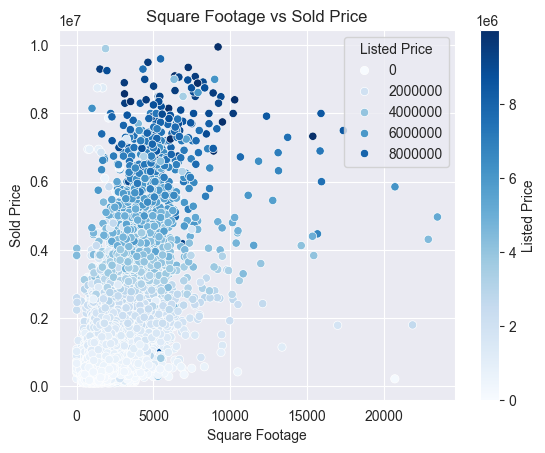

In [19]:
# Instead of plt.scatter, we use sns.scatterplot.
scatter_plot = sns.scatterplot(x=housing_df['Total interior livable area'], y=housing_df['Sold Price'], 
                hue=housing_df['Listed Price'],  # color of the dots (hue is used instead of c)
                palette='Blues')  # palette is used instead of cmap
# Add colorbar manually using Matplotlib for 'Listed Price' (Seaborn does not have a built-in colorbar)
norm = plt.Normalize(vmin=housing_df['Listed Price'].min(), vmax=housing_df['Listed Price'].max())  # Normalize the color scale
sm = plt.cm.ScalarMappable(cmap='Blues', norm=norm)  # Create a ScalarMappable with a Blues colormap
plt.colorbar(sm, ax=scatter_plot.axes, label='Listed Price')  # Add colorbar to the current figure
plt.title('Square Footage vs Sold Price')
plt.xlabel('Square Footage')
plt.ylabel('Sold Price')